In [62]:
import xarray as xr
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import cftime
from glob import glob

sys.path.append('..')
sys.path.append('../modules')
import constants
import xarray_class_accessors as xca
import sn_plotting

In [107]:
import file_corrections

In [17]:
constants.ZECMIP_DIR

'/g/data/oi10/replicas/CMIP6/C4MIP'

In [18]:
constants.DECK_DIR

'/g/data/oi10/replicas/CMIP6/CMIP'

In [12]:
os.listdir(constants.DECK_DIR)

['NASA-GISS',
 'MIROC',
 'IPSL',
 'CNRM-CERFACS',
 'THU',
 'EC-Earth-Consortium',
 'NOAA-GFDL',
 'MPI-M',
 'NCAR',
 'CMCC',
 'E3SM-Project',
 'NUIST',
 'MOHC',
 'BCC',
 'KIOST',
 'CAS',
 'CCCR-IITM',
 'HAMMOZ-Consortium',
 'INM',
 'UA',
 'CCCma',
 'FIO-QLNM',
 'CAMS',
 'NIMS-KMA',
 'AWI',
 'MRI',
 'SNU',
 'AS-RCEC',
 'NCC']

# Paths

In [109]:
constants.DECK_DIR

'/g/data/oi10/replicas/CMIP6/CMIP'

In [110]:
# Sample file name: tas_Amon_IPSL-CM5A2-INCA_piControl_r1i1p1f1_gr_185001-209912.nc
fpaths_picontrol= glob(constants.DECK_DIR + '/**/tas_Amon*piControl*.nc', recursive=True)
fpaths_1picontrol[:5]

NameError: name 'fpaths_1picontrol' is not defined

In [19]:
fpaths_1000PgC = glob(constants.ZECMIP_DIR + '/**/*brch-1000PgC*.nc', recursive=True)
fpaths_1000PgC[:5]

['/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r2i1p2f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_esm-1pct-brch-1000PgC_r2i1p2f1_gn_191101-201012.nc',
 '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r2i1p2f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_esm-1pct-brch-1000PgC_r2i1p2f1_gn_191101-201012.nc',
 '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r3i1p2f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_esm-1pct-brch-1000PgC_r3i1p2f1_gn_191101-201012.nc',
 '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r3i1p2f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_esm-1pct-brch-1000PgC_r3i1p2f1_gn_191101-201012.nc',
 '/g/data/oi10/replicas/CMIP6/C4MIP/CCCma/CanESM5/esm-1pct-brch-1000PgC/r1i1p2f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_esm-1pct-brch-1000PgC_r1i1p2f1_gn_191101-201012.nc']

In [23]:
len(fpaths_1pctCO2)

3637

In [22]:
len(fpaths_1000PgC)

80

In [20]:
fnames_1000PgC = list(map(os.path.basename, fpaths_1000PgC))
fnames_1000PgC[:5]

['pr_Amon_CanESM5_esm-1pct-brch-1000PgC_r2i1p2f1_gn_191101-201012.nc',
 'tas_Amon_CanESM5_esm-1pct-brch-1000PgC_r2i1p2f1_gn_191101-201012.nc',
 'pr_Amon_CanESM5_esm-1pct-brch-1000PgC_r3i1p2f1_gn_191101-201012.nc',
 'tas_Amon_CanESM5_esm-1pct-brch-1000PgC_r3i1p2f1_gn_191101-201012.nc',
 'tas_Amon_CanESM5_esm-1pct-brch-1000PgC_r1i1p2f1_gn_191101-201012.nc']

In [21]:
fnames_1pctCO2 = list(map(os.path.basename,fpaths_1pctCO2))
fnames_1pctCO2[:5]

['tas_day_GISS-E2-2-G_1pctCO2_r1i1p1f1_gn_19900101-19941231.nc',
 'tas_day_GISS-E2-2-G_1pctCO2_r1i1p1f1_gn_19600101-19891231.nc',
 'tas_day_GISS-E2-2-G_1pctCO2_r1i1p1f1_gn_18500101-18901231.nc',
 'tas_day_GISS-E2-2-G_1pctCO2_r1i1p1f1_gn_19950101-20001231.nc',
 'tas_Amon_GISS-E2-2-G_1pctCO2_r1i1p1f1_gn_195101-197512.nc']

# Single File Test

In [24]:
fpath = os.path.join(constants.ZECMIP_DIR, 
                     'MOHC/UKESM1-0-LL/esm-1pct-brch-1000PgC/r1i1p1f2/Amon/tas/gn/v20200210')
fpath

'/g/data/oi10/replicas/CMIP6/C4MIP/MOHC/UKESM1-0-LL/esm-1pct-brch-1000PgC/r1i1p1f2/Amon/tas/gn/v20200210'

In [25]:
any(['.nc' in f for f in  os.listdir(fpath)])

True

In [26]:
os.listdir(fpath)

['tas_Amon_UKESM1-0-LL_esm-1pct-brch-1000PgC_r1i1p1f2_gn_195001-204912.nc',
 'tas_Amon_UKESM1-0-LL_esm-1pct-brch-1000PgC_r1i1p1f2_gn_191601-194912.nc',
 'tas_Amon_UKESM1-0-LL_esm-1pct-brch-1000PgC_r1i1p1f2_gn_205001-214912.nc',
 'tas_Amon_UKESM1-0-LL_esm-1pct-brch-1000PgC_r1i1p1f2_gn_215001-224512.nc']

In [27]:
ukesm1 = xr.merge([xr.open_dataset(os.path.join(fpath, file)) for file in os.listdir(fpath)]).tas
ukesm1

<xarray.DataArray 'tas' (time: 3960, lat: 144, lon: 192)>
array([[[248.82227, 248.81323, 248.82715, ..., 248.83301, 248.81836,
         248.82349],
        [249.84863, 249.79126, 249.72437, ..., 250.03882, 249.98267,
         249.92871],
        [250.40234, 250.33545, 250.23804, ..., 250.5874 , 250.54785,
         250.4751 ],
        ...,
        [254.33447, 254.53174, 254.72241, ..., 253.7251 , 253.927  ,
         254.15332],
        [254.43555, 254.58301, 254.76831, ..., 253.91943, 254.12354,
         254.27539],
        [254.67188, 254.72388, 254.7229 , ..., 254.59961, 254.62207,
         254.64429]],

       [[237.20312, 237.20972, 237.19409, ..., 237.20947, 237.21216,
         237.20264],
        [238.42139, 238.32593, 238.20752, ..., 238.73096, 238.64697,
         238.50903],
        [239.30396, 239.11475, 238.96558, ..., 239.86328, 239.65991,
         239.49072],
...
        [268.99512, 269.0703 , 269.1421 , ..., 268.7976 , 268.84644,
         268.9192 ],
        [268.82812, 268.87354, 268.91968, ..., 268.69775, 268.74097,
         268.78394],
        [269.2661 , 269.27026, 269.27417, ..., 269.2517 , 269.25415,
         269.25977]],

       [[250.88794, 250.88574, 250.88062, ..., 250.8872 , 250.8833 ,
         250.88428],
        [251.92725, 251.86963, 251.8086 , ..., 252.10425, 252.04663,
         251.99023],
        [252.49951, 252.33862, 252.23071, ..., 252.73633, 252.64185,
         252.6101 ],
        ...,
        [261.95288, 261.98633, 262.0293 , ..., 261.86694, 261.8772 ,
         261.90552],
        [261.87256, 261.89575, 261.92432, ..., 261.78784, 261.81714,
         261.84644],
        [261.23242, 261.2307 , 261.2334 , ..., 261.24194, 261.23877,
         261.2373 ]]], dtype=float32)
Coordinates:
  * time     (time) object 1916-01-16 00:00:00 ... 2245-12-16 00:00:00
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
    height   float64 1.5
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-01-09T12:18:38Z altered by CMOR: Treated scalar dime...

In [28]:
ukesm1 = ukesm1.resample(time='Y').mean()

In [32]:
ukesm1.time

<xarray.DataArray 'time' (time: 330)>
array([cftime.Datetime360Day(1916, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1917, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1918, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.Datetime360Day(2243, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2244, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2245, 12, 30, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1916-12-30 00:00:00 ... 2245-12-30 00:00:00
    height   float64 1.5

In [39]:
t0 = cftime.DatetimeNoLeap(0, 1, 1, 0, 0, 0, 0, has_year_zero=True)
new_time = xr.cftime_range(start = t0, periods=len(ukesm1.time.values), freq='Y')
new_time[:5]

CFTimeIndex([0000-12-31 00:00:00, 0001-12-31 00:00:00, 0002-12-31 00:00:00,
             0003-12-31 00:00:00, 0004-12-31 00:00:00],
            dtype='object', length=5, calendar='noleap', freq='A-DEC')

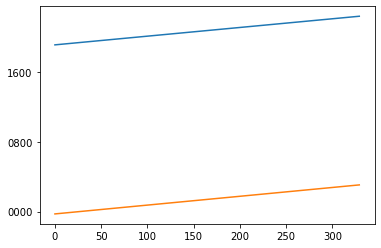

In [40]:
plt.plot(ukesm1.time.values)
plt.plot(new_time)

In [41]:
ukesm1['time'] = new_time

In [43]:
ukesm1 = ukesm1 - 273

In [50]:
ukesm1_smean = ukesm1.clima.space_mean()
ukesm1_smean

<xarray.DataArray 'tas' (time: 330)>
array([16.153535  , 16.30145796, 16.29218305, 16.31590005, 16.49617713,
       16.3006305 , 16.15517705, 16.26342241, 16.09975315, 16.31307306,
       16.38266929, 16.5230779 , 16.40479831, 16.37928384, 16.35434808,
       16.32676306, 16.39856163, 16.48562201, 16.39734363, 16.37416293,
       16.37079177, 16.3597186 , 16.31838265, 16.2104154 , 16.13895396,
       16.3668578 , 16.5159208 , 16.45955652, 16.32736425, 16.34279989,
       16.34574107, 16.36764731, 16.49305707, 16.46667706, 16.31050421,
       16.31565761, 16.57309827, 16.53509897, 16.29355395, 16.23831702,
       16.32796018, 16.62173911, 16.4724018 , 16.48352116, 16.46829506,
       16.46366029, 16.34357504, 16.29359136, 16.41750643, 16.43081426,
       16.41795034, 16.43127175, 16.4605369 , 16.27924538, 16.25520184,
       16.34396803, 16.45655591, 16.45654247, 16.42406767, 16.54061951,
       16.60773923, 16.48704449, 16.38412878, 16.4771467 , 16.48413238,
       16.4518615 , 16.49304963, 16.52619891, 16.53748199, 16.44285891,
       16.43729632, 16.53120877, 16.56426911, 16.57216106, 16.38588805,
       16.45342854, 16.42970267, 16.33944906, 16.36083937, 16.48922973,
       16.46534401, 16.41213471, 16.54826994, 16.6468333 , 16.53893139,
       16.3827841 , 16.25618717, 16.22979777, 16.44287033, 16.36402212,
       16.2239158 , 16.09742311, 16.29444911, 16.34281773, 16.23772305,
       16.32006611, 16.28709456, 16.24580584, 16.33624196, 16.39392928,
...
       16.50968007, 16.4415088 , 16.52873587, 16.53224234, 16.46885839,
       16.52983763, 16.47926898, 16.45409701, 16.56497259, 16.6201542 ,
       16.53818078, 16.66877647, 16.5991841 , 16.50491106, 16.40059093,
       16.48800486, 16.60412881, 16.60030743, 16.63705832, 16.46348292,
       16.32383763, 16.35483232, 16.41096298, 16.37268081, 16.59730992,
       16.52455998, 16.41086171, 16.37574574, 16.39218249, 16.44245807,
       16.47835359, 16.37033524, 16.41232896, 16.48262191, 16.50006827,
       16.47963891, 16.37462197, 16.35246053, 16.37776221, 16.49243737,
       16.42183617, 16.59475074, 16.55422008, 16.39015767, 16.33954811,
       16.54871908, 16.67363816, 16.57340048, 16.59597204, 16.72647853,
       16.54161865, 16.68821352, 16.75799823, 16.59534722, 16.6906232 ,
       16.56643702, 16.60406208, 16.63647475, 16.56615962, 16.5987898 ,
       16.71294176, 16.61836519, 16.67871385, 16.55137157, 16.4294562 ,
       16.54399155, 16.67668575, 16.58770301, 16.4723729 , 16.44298408,
       16.53056803, 16.58307313, 16.53932363, 16.37112317, 16.37769932,
       16.48791916, 16.51040334, 16.60800134, 16.49664148, 16.59300462,
       16.75229298, 16.54306764, 16.59578558, 16.6292624 , 16.47376054,
       16.61025834, 16.61846022, 16.53445789, 16.66141284, 16.65364711,
       16.58657762, 16.69856619, 16.62573545, 16.44425715, 16.44178755,
       16.61630733, 16.62956058, 16.56486286, 16.60527568, 16.59563787])
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0329-12-31 00:00:00
    height   float64 1.5

In [52]:
ukesm1_smean_signal = ukesm1_smean.sn.signal_grad()
ukesm1_smean_signal

<xarray.DataArray 'signal' (time: 270)>
array([ 0.15459948,  0.14268368,  0.13452475,  0.13417339,  0.1362731 ,
        0.15273485,  0.15377084,  0.14284877,  0.1426463 ,  0.11603577,
        0.10911212,  0.11783568,  0.14332033,  0.15760788,  0.15077768,
        0.14796878,  0.13978571,  0.12971621,  0.13061347,  0.13551029,
        0.13548111,  0.1296714 ,  0.13579538,  0.14671592,  0.1353381 ,
        0.10064338,  0.07570118,  0.06346847,  0.06714224,  0.05002013,
        0.02076465, -0.02005443, -0.03881484, -0.04011731, -0.05374359,
       -0.07427991, -0.09752253, -0.09892463, -0.09431899, -0.10764374,
       -0.12726719, -0.1486645 , -0.14856623, -0.15358331, -0.14132341,
       -0.13729803, -0.13697994, -0.1506026 , -0.15772131, -0.14117728,
       -0.12730552, -0.12607307, -0.11410814, -0.10903859, -0.12627755,
       -0.15574765, -0.17044393, -0.17113783, -0.1679554 , -0.17610483,
       -0.17418209, -0.14769852, -0.132868  , -0.12912409, -0.10455841,
       -0.11480206, -0.12652892, -0.12167699, -0.08713078, -0.05053412,
       -0.05507933, -0.06618234, -0.05246131, -0.00805317,  0.01971249,
        0.02290159,  0.02780339,  0.02966767,  0.03413092,  0.05221829,
        0.05528725,  0.05632639,  0.05966953,  0.06442671,  0.08994261,
        0.11649044,  0.12899232,  0.11794457,  0.10346881,  0.11388188,
        0.1368069 ,  0.11636364,  0.07711219,  0.07408226,  0.08295309,
        0.08813087,  0.08780534,  0.0810103 ,  0.07055117,  0.07188727,
...
       -0.01532883, -0.00961875, -0.00727896,  0.00416332,  0.01465186,
        0.03414217,  0.05415406,  0.07040601,  0.08770447,  0.09451189,
        0.09722067,  0.13307138,  0.14233328,  0.14604691,  0.13688797,
        0.14391051,  0.15969456,  0.15948502,  0.17345207,  0.17810003,
        0.16441699,  0.16402414,  0.16038477,  0.14760023,  0.16189648,
        0.15239363,  0.13322401,  0.12263952,  0.10795352,  0.09804139,
        0.08097177,  0.05800645,  0.05870265,  0.05100558,  0.05377155,
        0.05539914,  0.04125274,  0.02376655,  0.00727525, -0.00303884,
       -0.01929181, -0.02674944, -0.0271677 , -0.01465401, -0.01684347,
       -0.01132163,  0.00610906,  0.0009388 , -0.00936211,  0.00578241,
        0.0152084 ,  0.04078016,  0.05669853,  0.06633445,  0.076951  ,
        0.06973039,  0.06820677,  0.07710283,  0.07898835,  0.09069148,
        0.11422432,  0.12330048,  0.13104911,  0.13443181,  0.12629389,
        0.12323321,  0.13886945,  0.1403639 ,  0.12783039,  0.12348139,
        0.13351994,  0.14073127,  0.15662354,  0.14969669,  0.13471462,
        0.12037733,  0.11667563,  0.13395903,  0.14007104,  0.15951801,
        0.17716455,  0.15966731,  0.14966407,  0.14773633,  0.12622761,
        0.1400652 ,  0.14737976,  0.13489233,  0.13078057,  0.12663946,
        0.12019187,  0.12770653,  0.11666087,  0.09142828,  0.07288301,
        0.0731031 ,  0.07218787,  0.05402625,  0.03694573,  0.02064715])
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0269-12-31 00:00:00
    height   float64 1.5

In [54]:
ukesm1_smean_loess = ukesm1_smean.sn.loess_grid()
ukesm1_smean_loess

<xarray.DataArray 'tas' (time: 330)>
array([-1.45091020e-01, -3.54511783e-04, -1.27896068e-02,  7.79231374e-03,
        1.84958057e-01, -1.36772586e-02, -1.62196712e-01, -5.69947750e-02,
       -2.23686408e-01, -1.33706094e-02,  5.32356415e-02,  1.90663731e-01,
        6.94088393e-02,  4.09211442e-02,  1.30120109e-02, -1.75481686e-02,
        5.12721118e-02,  1.35349786e-01,  4.40839319e-02,  1.79124044e-02,
        1.15500872e-02, -2.50987103e-03, -4.68215663e-02, -1.57744411e-01,
       -2.32129503e-01, -7.10239123e-03,  1.39152011e-01,  8.00818987e-02,
       -5.46558865e-02, -4.15288667e-02, -4.02414008e-02, -1.98550609e-02,
        1.04119006e-01,  7.63436737e-02, -8.12091190e-02, -7.74437634e-02,
        1.78556959e-01,  1.39016242e-01, -1.04210336e-01, -1.61296261e-01,
       -7.36805808e-02,  2.17903282e-01,  6.62254121e-02,  7.48743442e-02,
        5.70562391e-02,  4.97190674e-02, -7.31451200e-02, -1.25931365e-01,
       -4.78411440e-03,  5.84496058e-03, -9.56303564e-03,  1.37376821e-03,
        2.84197187e-02, -1.54933246e-01, -1.80904084e-01, -9.39577965e-02,
        1.69031533e-02,  1.52609603e-02, -1.87316071e-02,  9.64237466e-02,
        1.62276839e-01,  4.04662954e-02, -6.33765827e-02,  2.89419454e-02,
        3.54860709e-02,  3.05056421e-03,  4.43794057e-02,  7.80100605e-02,
        9.01356374e-02, -3.28255037e-03, -7.28222540e-03,  8.85430593e-02,
        1.23859702e-01,  1.34344660e-01, -4.90002683e-02,  2.17936723e-02,
        1.60706831e-03, -8.48785285e-02, -5.95442558e-02,  7.29207749e-02,
...
       -6.70705972e-02, -1.04461631e-01,  1.20862689e-01,  4.85537321e-02,
       -6.50040012e-02, -1.00304609e-01, -8.43916932e-02, -3.49870069e-02,
       -3.13327894e-04, -1.09911318e-01, -6.98654217e-02, -1.89207955e-03,
        1.28602951e-02, -1.06243036e-02, -1.19017770e-01, -1.44831960e-01,
       -1.23421350e-01, -1.28287856e-02, -8.76465790e-02,  8.09785569e-02,
        3.61412236e-02, -1.32198938e-01, -1.87021367e-01,  1.80308236e-02,
        1.38964070e-01,  3.49215078e-02,  5.39100554e-02,  1.81071761e-01,
       -6.89983095e-03,  1.36790315e-01,  2.03841056e-01,  3.86099464e-02,
        1.31458769e-01,  5.01196831e-03,  4.05585811e-02,  7.10740919e-02,
       -9.60979944e-04,  3.01324891e-02,  1.42933925e-01,  4.71909643e-02,
        1.06553905e-01, -2.15973972e-02, -1.44140238e-01, -3.00336617e-02,
        1.02442489e-01,  1.34414172e-02, -1.01730047e-01, -1.30806756e-01,
       -4.27838915e-02,  9.42109148e-03, -3.45857418e-02, -2.02986309e-01,
       -1.96559760e-01, -8.64561295e-02, -6.40739353e-02,  3.34189199e-02,
       -7.80634458e-02,  1.81492475e-02,  1.77250801e-01, -3.22035357e-02,
        2.02400483e-02,  5.33950130e-02, -1.02477321e-01,  3.36011385e-02,
        4.13343873e-02, -4.31856683e-02,  8.32032144e-02,  7.48239684e-02,
        7.09526348e-03,  1.18381493e-01,  4.48082818e-02, -1.37448726e-01,
       -1.40729175e-01,  3.29503742e-02,  4.53353966e-02, -2.02570222e-02,
        1.92365186e-02,  8.65656654e-03])
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0329-12-31 00:00:00
    height   float64 1.5

In [57]:
ukesm1_smean_noise = ukesm1_smean_loess.sn.noise_grad()
ukesm1_smean_noise

<xarray.DataArray 'noise' (time: 270)>
array([0.10151032, 0.09992322, 0.10026493, 0.10031275, 0.10040324,
       0.09758261, 0.09773849, 0.09595374, 0.09624476, 0.09157101,
       0.09154902, 0.09193202, 0.09015979, 0.09123918, 0.09146099,
       0.09147415, 0.09141495, 0.09202608, 0.09089756, 0.09117935,
       0.0913744 , 0.0913706 , 0.09306346, 0.09762742, 0.09650954,
       0.09107274, 0.09307715, 0.09434912, 0.09415332, 0.09382138,
       0.09595899, 0.10257924, 0.10310348, 0.10243116, 0.10343068,
       0.10305882, 0.10304799, 0.10158119, 0.09996073, 0.09925402,
       0.09719987, 0.09720231, 0.0950685 , 0.09493682, 0.09521583,
       0.09492874, 0.09463723, 0.09436284, 0.09374593, 0.09719995,
       0.09931548, 0.09944932, 0.10093862, 0.10097545, 0.09890121,
       0.0971257 , 0.09655401, 0.09664153, 0.09663625, 0.09718661,
       0.09738576, 0.09566307, 0.09597834, 0.09591659, 0.09856854,
       0.10129766, 0.10370473, 0.1037498 , 0.10689228, 0.1101283 ,
       0.11087904, 0.11290537, 0.11232257, 0.11617601, 0.11538533,
       0.11524265, 0.11529481, 0.11544671, 0.1152719 , 0.11741874,
       0.1177501 , 0.11825425, 0.11830466, 0.1184303 , 0.11398668,
       0.11256003, 0.11299228, 0.11199793, 0.11054816, 0.11019605,
       0.11318965, 0.11228939, 0.10868837, 0.10827064, 0.10876176,
       0.10926191, 0.10909863, 0.10859104, 0.10742537, 0.10738831,
...
       0.0865567 , 0.0865623 , 0.08616582, 0.08630686, 0.08588696,
       0.08504497, 0.08262645, 0.08064864, 0.08107262, 0.08157912,
       0.08137614, 0.08242526, 0.08329694, 0.08330332, 0.08401224,
       0.08380072, 0.08503533, 0.08456512, 0.08653665, 0.08619833,
       0.08870319, 0.08882284, 0.08914784, 0.09012169, 0.09131989,
       0.09002883, 0.08940519, 0.09036093, 0.09089758, 0.0908856 ,
       0.08902077, 0.08944411, 0.08884677, 0.08865029, 0.08847581,
       0.08820573, 0.0894871 , 0.09129341, 0.09247819, 0.09194689,
       0.0921764 , 0.09090123, 0.09094081, 0.08603496, 0.08660793,
       0.08662355, 0.08866716, 0.08787573, 0.08535968, 0.08835309,
       0.08766882, 0.08846024, 0.09183053, 0.09181608, 0.09304398,
       0.09212225, 0.09163754, 0.09196531, 0.09197445, 0.09167636,
       0.09282668, 0.09291671, 0.09342484, 0.09345573, 0.09545357,
       0.09551373, 0.09616614, 0.0961269 , 0.09700893, 0.09826112,
       0.0971464 , 0.09697907, 0.09437199, 0.09669731, 0.09963687,
       0.09963673, 0.09986899, 0.09863332, 0.09757827, 0.09520742,
       0.09835119, 0.09665073, 0.09563116, 0.09566417, 0.09563151,
       0.09434594, 0.09427837, 0.09410632, 0.09406004, 0.09404646,
       0.09396352, 0.09520528, 0.09430949, 0.09553835, 0.09722087,
       0.09730194, 0.09746932, 0.09629128, 0.09443524, 0.09298376])
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0269-12-31 00:00:00
    height   float64 1.5

In [59]:
ukesm1_smean_sn = ukesm1_smean_signal/ukesm1_smean_noise
ukesm1_smean_sn

<xarray.DataArray (time: 270)>
array([ 1.52299267,  1.42793321,  1.34169299,  1.3375507 ,  1.35725795,
        1.56518516,  1.57328844,  1.48872537,  1.48212017,  1.26716707,
        1.19184367,  1.28176964,  1.58962578,  1.72741443,  1.6485464 ,
        1.61760215,  1.52913409,  1.40955933,  1.43693048,  1.48619501,
        1.4827032 ,  1.41918073,  1.4591697 ,  1.50281467,  1.40232873,
        1.10508788,  0.81331648,  0.67269808,  0.71311596,  0.53314206,
        0.21639091, -0.19550186, -0.37646486, -0.39165137, -0.51960972,
       -0.72075253, -0.94637968, -0.97384789, -0.94356049, -1.08452776,
       -1.30933505, -1.52943381, -1.56272821, -1.61774232, -1.48424281,
       -1.44632732, -1.44742121, -1.59599471, -1.68243371, -1.45244196,
       -1.28182967, -1.26771165, -1.13047056, -1.07985245, -1.27680488,
       -1.60356785, -1.76527032, -1.77085191, -1.73801663, -1.81202776,
       -1.78857861, -1.54394506, -1.38435403, -1.34621224, -1.06076861,
       -1.13331402, -1.22008817, -1.17279244, -0.81512698, -0.45886585,
       -0.49675149, -0.58617528, -0.46705941, -0.0693187 ,  0.17084054,
        0.19872493,  0.24115045,  0.25698154,  0.29609051,  0.4447185 ,
        0.46953037,  0.47631595,  0.50437173,  0.54400526,  0.78906248,
        1.03491832,  1.14160291,  1.05309596,  0.93596137,  1.03344794,
        1.20865208,  1.03628345,  0.70947967,  0.68423219,  0.76270452,
        0.80660201,  0.8048253 ,  0.74601273,  0.65674587,  0.66941426,
...
       -0.17709586, -0.11111936, -0.08447624,  0.04823863,  0.17059474,
        0.40146021,  0.65540828,  0.87299692,  1.08180137,  1.1585304 ,
        1.19470736,  1.61444899,  1.70874557,  1.7531943 ,  1.62938121,
        1.71729448,  1.87797902,  1.88594335,  2.00437694,  2.06616558,
        1.85356349,  1.84664378,  1.79908759,  1.63778799,  1.77285009,
        1.69272035,  1.4901149 ,  1.35721841,  1.18763907,  1.07873401,
        0.90958288,  0.64852174,  0.66071789,  0.57535711,  0.60775419,
        0.62806743,  0.46099094,  0.26033151,  0.07866993, -0.03304999,
       -0.20929229, -0.29426924, -0.29874048, -0.17032624, -0.19447953,
       -0.13069922,  0.06889877,  0.01068329, -0.10967837,  0.06544666,
        0.17347555,  0.46099982,  0.61742573,  0.72247096,  0.82703903,
        0.75693329,  0.7443104 ,  0.83839039,  0.85880746,  0.989257  ,
        1.23051178,  1.32700008,  1.40272236,  1.43845456,  1.32309237,
        1.2902146 ,  1.44405762,  1.46019385,  1.31771771,  1.25666581,
        1.37441988,  1.45115102,  1.6596401 ,  1.54809566,  1.35205585,
        1.20816225,  1.16828678,  1.35815187,  1.43547364,  1.67547876,
        1.80134636,  1.65200315,  1.56501369,  1.54432252,  1.31993749,
        1.48459172,  1.56324052,  1.4334036 ,  1.39039453,  1.3465627 ,
        1.27913328,  1.34138083,  1.23700035,  0.95697992,  0.74966422,
        0.75130158,  0.74062143,  0.5610711 ,  0.39122823,  0.22205117])
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0269-12-31 00:00:00
    height   float64 1.5

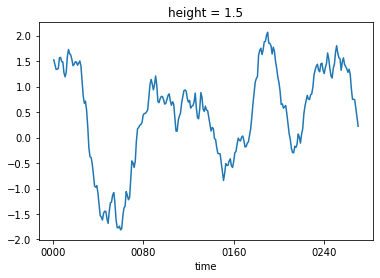

In [60]:
ukesm1_smean_sn.plot()

[<AxesSubplot:xlabel='Year', ylabel='$\\dfrac{Signal}{Noise}$'>,
 <AxesSubplot:ylabel='Tempearture\nAnomaly'>]

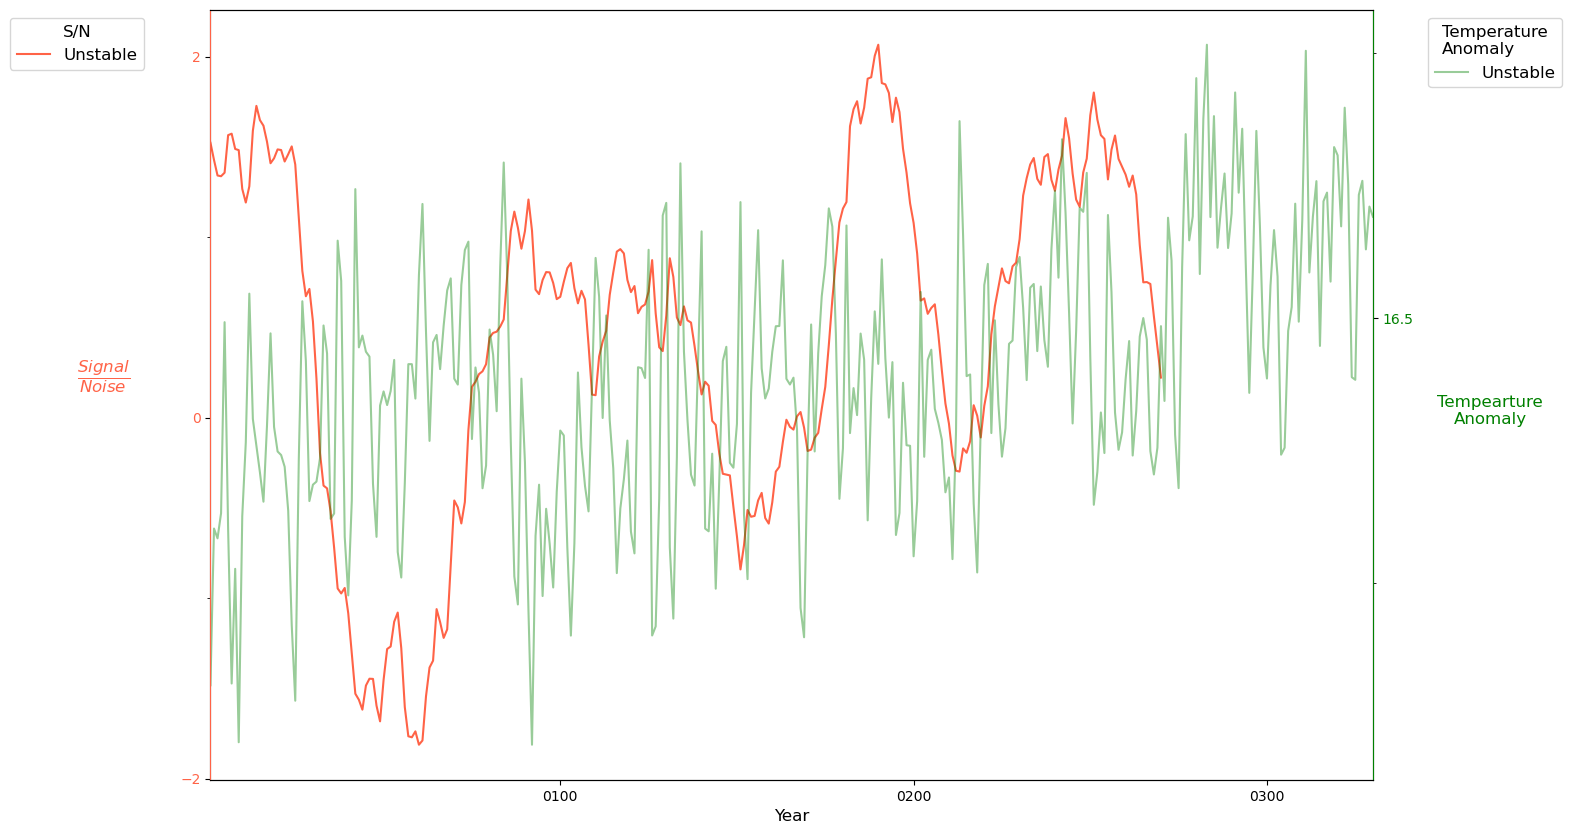

In [65]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
sn_plotting.temperature_vs_sn_plot(ax, ukesm1_smean_sn, ukesm1_smean)

# ACCESS

In [15]:
glob('/g/data/fs38/publications/CMIP6/C4MIP' + '*/**/*1000PgC*', recursive = True)

['/g/data/fs38/publications/CMIP6/C4MIP/CSIRO/ACCESS-ESM1-5/esm-1pct-brch-1000PgC',
 '/g/data/fs38/publications/CMIP6/C4MIP/CSIRO/ACCESS-ESM1-5/esm-1pct-brch-1000PgC/r1i1p1f1/Emon/mrsol/gn/files/d20191206/mrsol_Emon_ACCESS-ESM1-5_esm-1pct-brch-1000PgC_r1i1p1f1_gn_016801-026712.nc',
 '/g/data/fs38/publications/CMIP6/C4MIP/CSIRO/ACCESS-ESM1-5/esm-1pct-brch-1000PgC/r1i1p1f1/Emon/mrsol/gn/files/d20191206/mrsol_Emon_ACCESS-ESM1-5_esm-1pct-brch-1000PgC_r1i1p1f1_gn_026801-026812.nc',
 '/g/data/fs38/publications/CMIP6/C4MIP/CSIRO/ACCESS-ESM1-5/esm-1pct-brch-1000PgC/r1i1p1f1/Emon/mrsol/gn/latest/mrsol_Emon_ACCESS-ESM1-5_esm-1pct-brch-1000PgC_r1i1p1f1_gn_026801-026812.nc',
 '/g/data/fs38/publications/CMIP6/C4MIP/CSIRO/ACCESS-ESM1-5/esm-1pct-brch-1000PgC/r1i1p1f1/Emon/mrsol/gn/latest/mrsol_Emon_ACCESS-ESM1-5_esm-1pct-brch-1000PgC_r1i1p1f1_gn_016801-026712.nc',
 '/g/data/fs38/publications/CMIP6/C4MIP/CSIRO/ACCESS-ESM1-5/esm-1pct-brch-1000PgC/r1i1p1f1/Emon/mrsol/gn/v20191206/mrsol_Emon_ACCESS-ESM1-

In [67]:
access_path = '/g/data/fs38/publications/CMIP6/C4MIP/CSIRO/ACCESS-ESM1-5/esm-1pct-brch-1000PgC/r1i1p1f1/Amon/tas/gn/latest'

In [68]:
os.listdir(access_path)

['tas_Amon_ACCESS-ESM1-5_esm-1pct-brch-1000PgC_r1i1p1f1_gn_016801-026812.nc']

In [81]:
access_ds = xr.open_dataset(os.path.join(access_path, 'tas_Amon_ACCESS-ESM1-5_esm-1pct-brch-1000PgC_r1i1p1f1_gn_016801-026812.nc'), use_cftime=True).tas
access_ds

<xarray.DataArray 'tas' (time: 1212, lat: 145, lon: 192)>
[33742080 values with dtype=float32]
Coordinates:
  * time     (time) object 0168-01-16 12:00:00 ... 0268-12-16 12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-12-05T22:55:08Z altered by CMOR: Treated scalar dime...

In [82]:
access_ds = access_ds.resample(time='Y').mean()

In [83]:
access_ds_smean = access_ds.clima.space_mean()

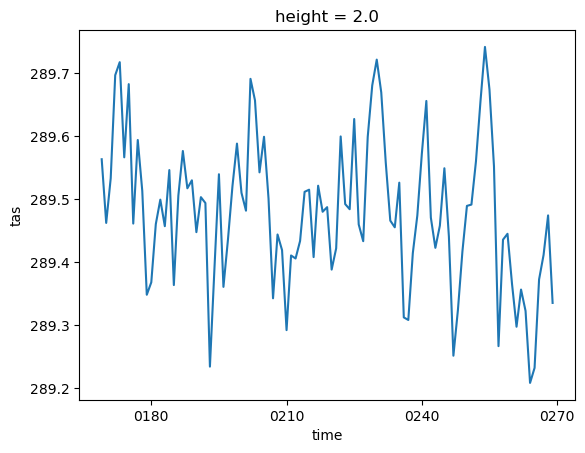

In [84]:
access_ds_smean.plot()

In [99]:
access_ds_smean_signal = access_ds_smean.sn.signal_grad(roll_period=31)
access_ds_smean_signal

<xarray.DataArray 'signal' (time: 71)>
array([-0.13575864, -0.12089628, -0.13088778, -0.08773247, -0.02024444,
        0.0304639 ,  0.06374579,  0.10147316,  0.06753221,  0.08059175,
        0.07468083,  0.01320988, -0.02139473, -0.03895   , -0.04283821,
       -0.03973283, -0.01886392, -0.05415126, -0.04036907, -0.02037665,
       -0.00964021, -0.01457316, -0.02786865,  0.00355752,  0.01179389,
       -0.03339781, -0.0238817 , -0.01863493, -0.05312572, -0.04247751,
       -0.00157646,  0.05847215,  0.09147665,  0.09594978,  0.12404696,
        0.14612507,  0.16116703,  0.14762498,  0.11730076,  0.07760129,
        0.06847006,  0.07232404,  0.06461877,  0.04134553,  0.00737887,
       -0.01462186, -0.00427173, -0.01402737, -0.07969615, -0.1071926 ,
       -0.12301038, -0.12305152, -0.14253771, -0.14374643, -0.09333458,
       -0.04883148, -0.02175224,  0.00873886, -0.04678596, -0.07354474,
       -0.06547601, -0.05404861, -0.04326403, -0.02653778, -0.03451819,
       -0.07938407, -0.11869138, -0.11472541, -0.14429166, -0.16416298,
       -0.19093679])
Coordinates:
  * time     (time) object 0168-12-31 00:00:00 ... 0238-12-31 00:00:00
    height   float64 2.0

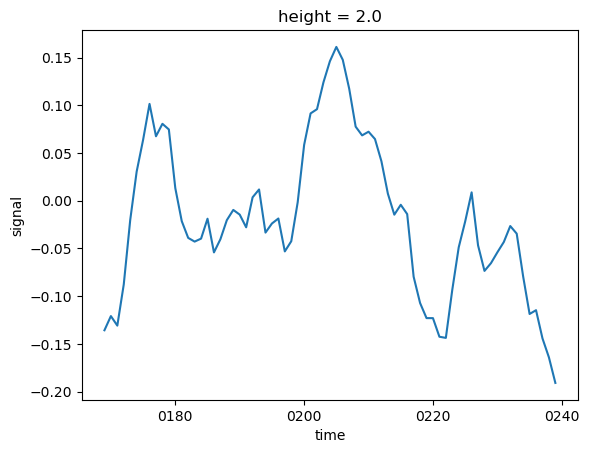

In [100]:
access_ds_smean_signal.plot()

In [101]:
access_ds_smean_loess = access_ds_smean.sn.loess_grid()
access_ds_smean_noise = access_ds_smean_loess.sn.noise_grad(roll_period=31)

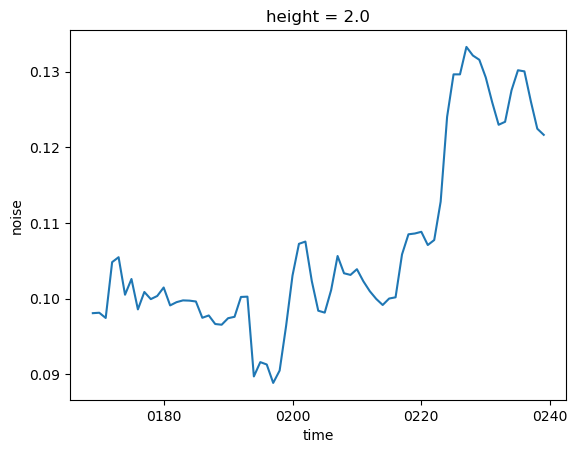

In [102]:
access_ds_smean_noise.plot()

In [103]:
access_ds_smean_sn = access_ds_smean_signal/access_ds_smean_noise

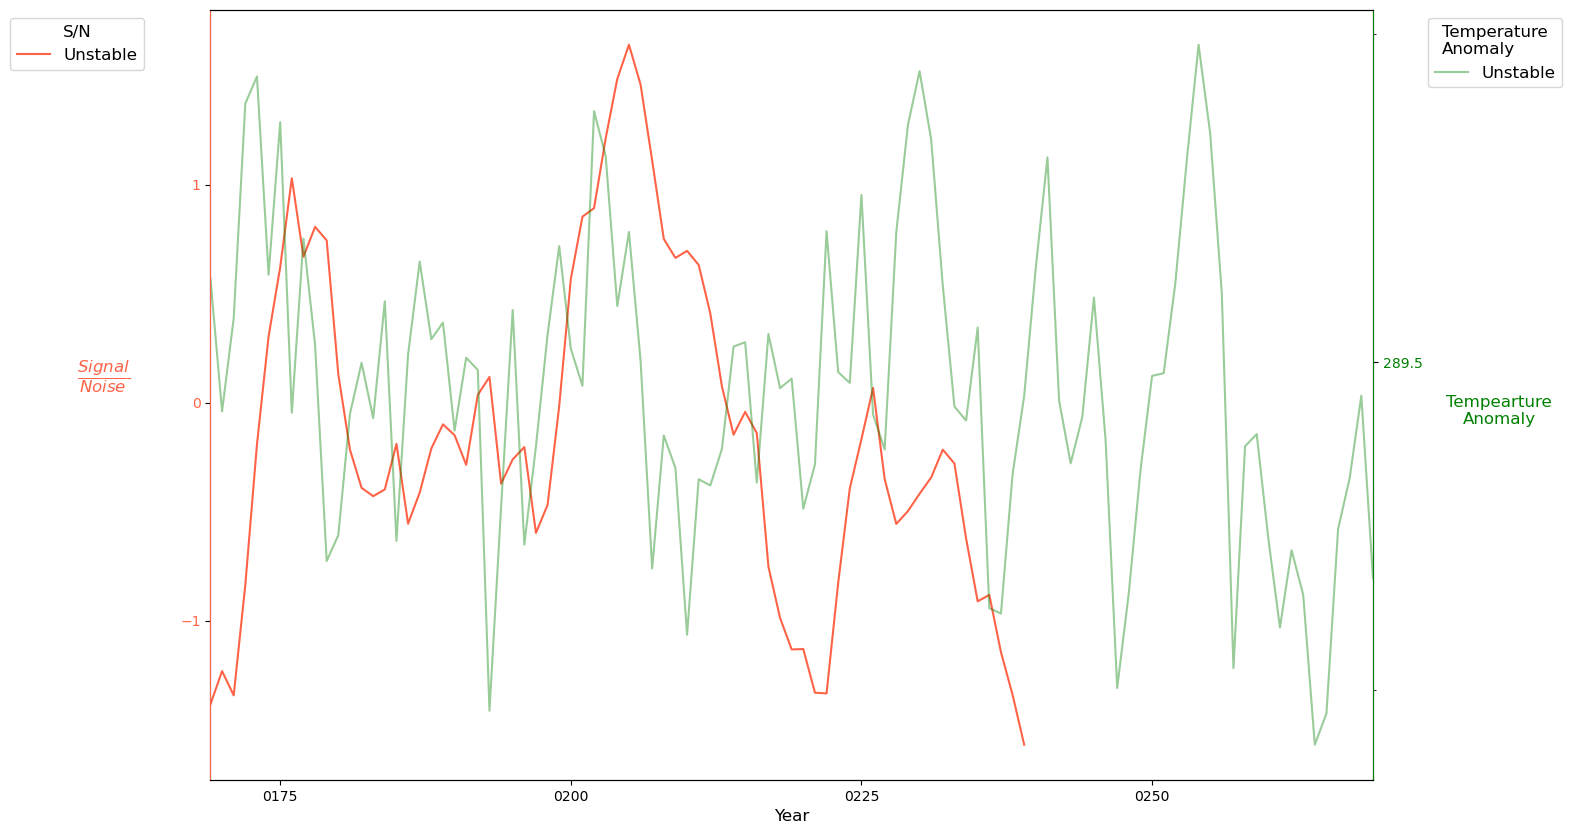

In [104]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
sn_plotting.temperature_vs_sn_plot(ax, access_ds_smean_sn, access_ds_smean)


ax.set_yticks([-1, 0, 1])